In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
plt.style.use('seaborn')
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV


C:\Users\Shriyans\AppData\Local\Temp\ipykernel_27456\1479043818.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [2]:
#Workflow
#1. Basic EDA
#2. Data Preprocessing- Deal with outliers 
#3. Splitting the dataset into training and testing 
#4. Resampling- Oversampling and Undersampling
#5. Testing various models
#6. Hyperparameter tuning 

## 1. Basic EDA

In [3]:
df = pd.read_csv('creditcard.csv')

In [4]:
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
#check the column names 

df.columns

#we have 28 features + the time and amount 

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [7]:
#Check for null values
df.isnull().sum()
#There are no null values 

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
#Check the class balance
print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

df['Class'].value_counts()

#As we can see the dataset is extremely unbalancded with only 492 instances of fraud

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


0    284315
1       492
Name: Class, dtype: int64

## 2. Data Pre-Processing

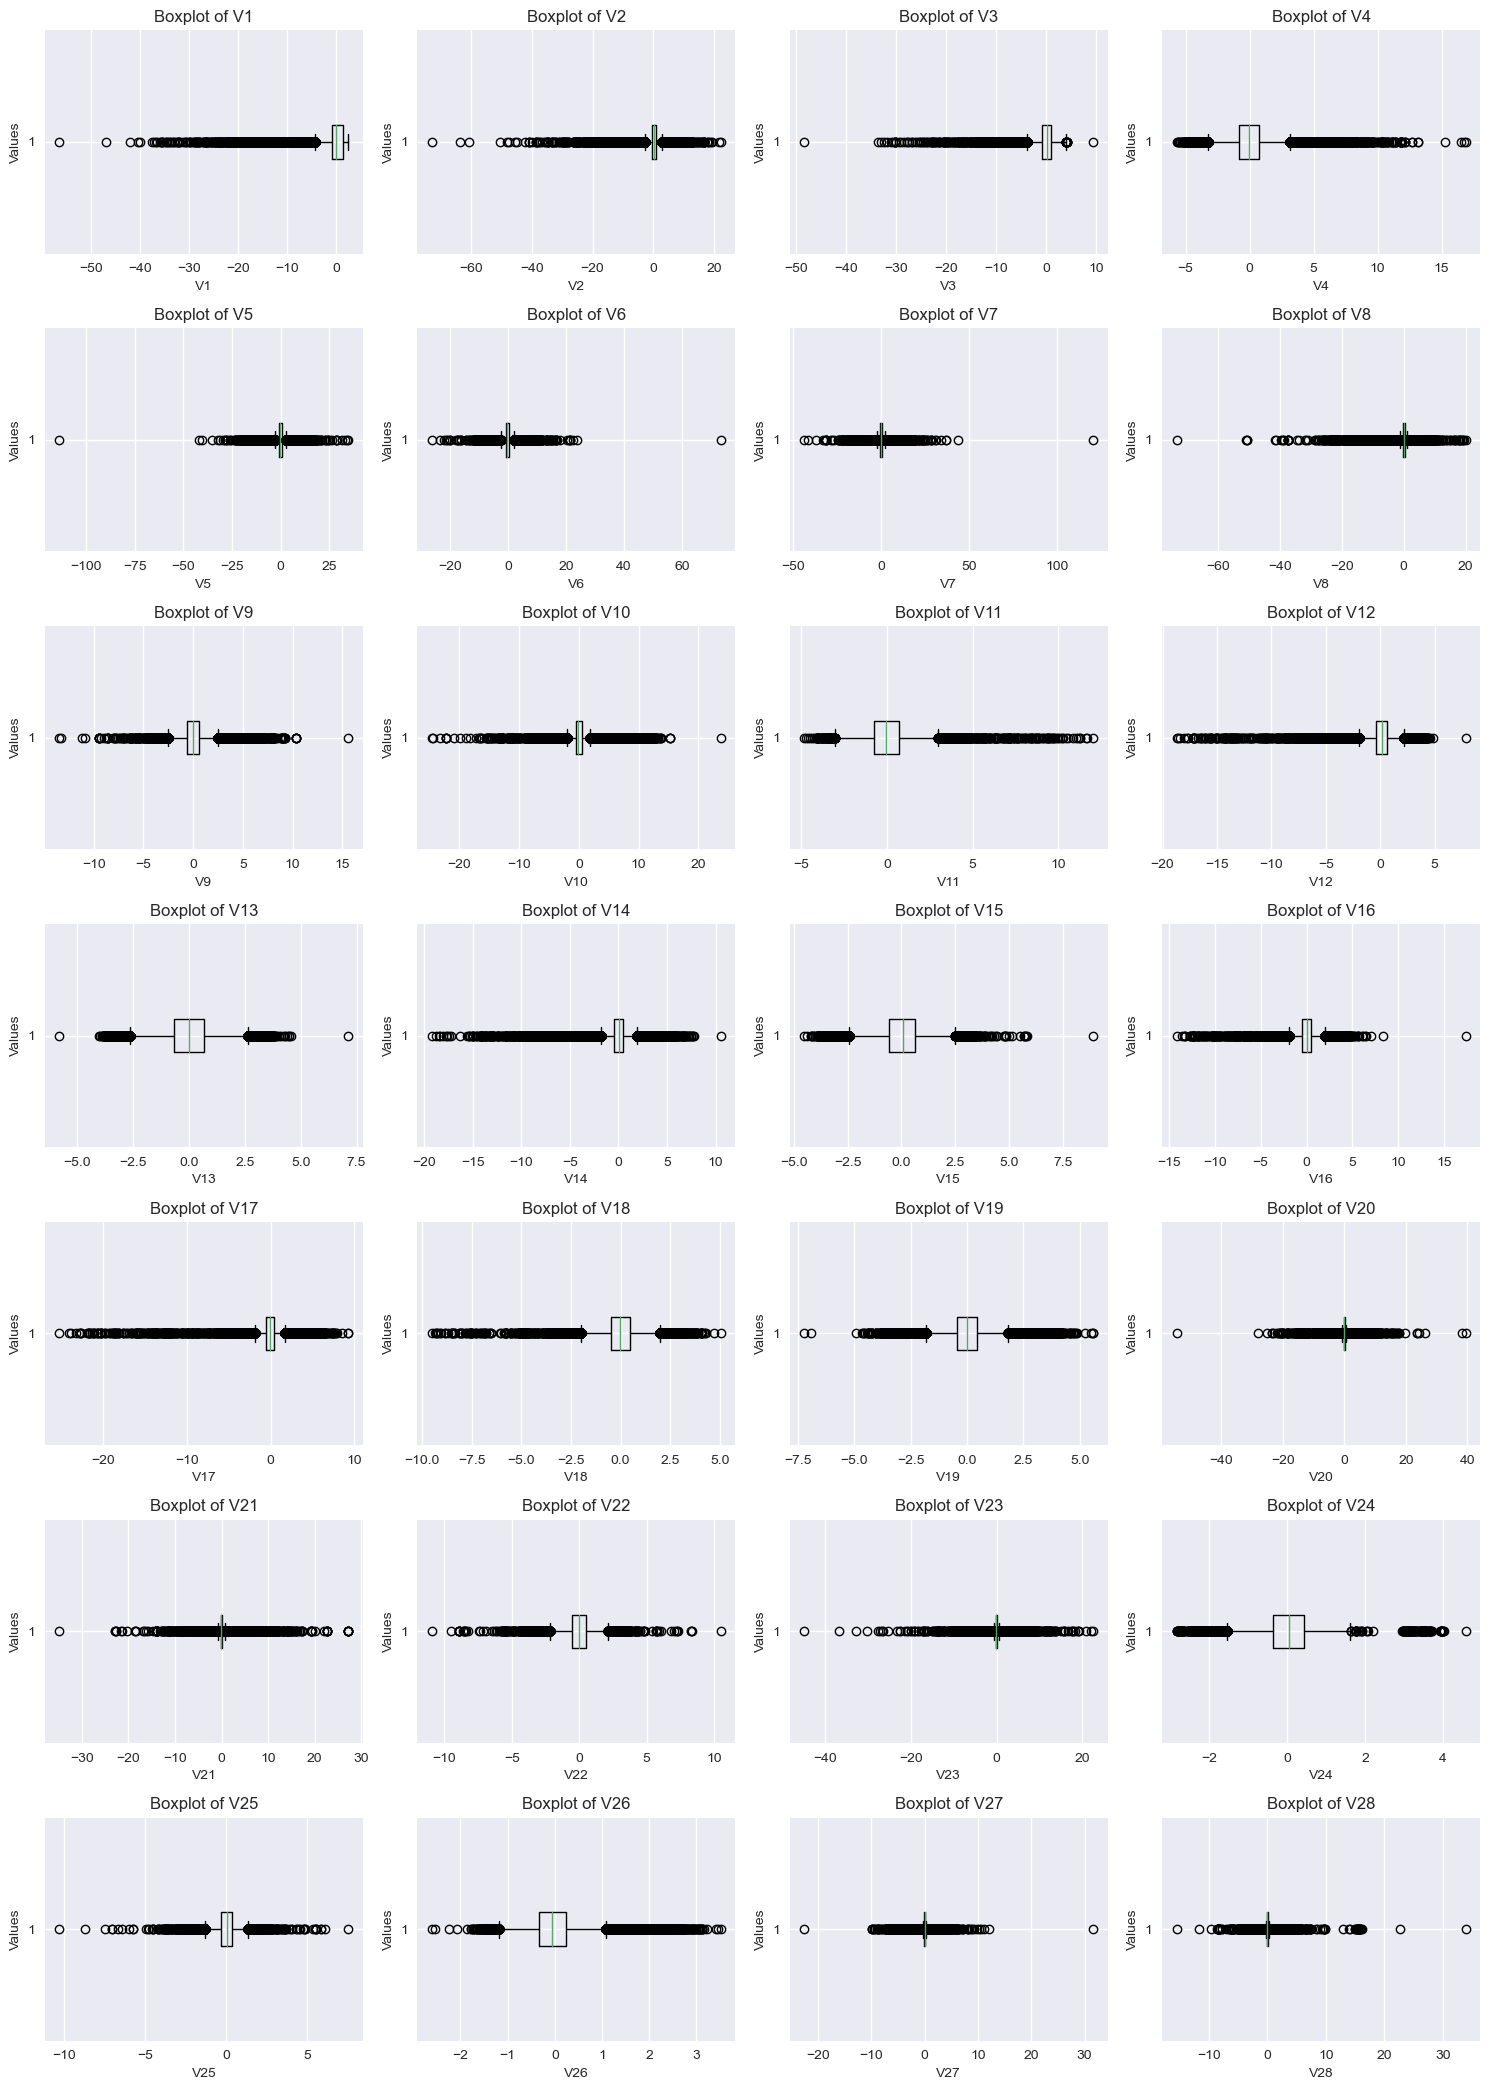

In [9]:
#Checking for outliers 
# Selecting only the columns representing features (excluding 'Time', 'Amount', 'Class')
features = df.drop(['Time', 'Amount', 'Class'], axis=1)

num_features = len(features.columns)
num_rows = (num_features // 4) + (1 if num_features % 4 > 0 else 0)
num_cols = 4

fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 3))

# Flatten the axes object for easy iteration
axs = axs.flatten()

# Plot box and whisker plots for each feature
for i, column in enumerate(features.columns):
    axs[i].boxplot(features[column], vert = False)
    axs[i].set_title(f'Boxplot of {column}')
    axs[i].set_xlabel(column)
    axs[i].set_ylabel('Values')
    axs[i].grid(True)

# Hide any extra subplots
for j in range(num_features, num_rows * num_cols):
    axs[j].axis('off')

plt.tight_layout()
plt.show()


As we can see our data has numerous outliers and is also very skewed, however I am choosing not to remove outliers as outliers in credit card transactions may be instances of fraud. In addition, the goal is to build a robust model that is not heavily influenced by outliers.

In [10]:
#Scaling time and amount

#For time I will be using MinMax Scaler

#For amount I will be using RobustScaling

MinMax = MinMaxScaler()
RobScaler = RobustScaler()

df['scaled_time'] = MinMax.fit_transform(df['Time'].values.reshape(-1,1))
df['scaled_amount'] = RobScaler.fit_transform(df['Amount'].values.reshape(-1,1))

In [11]:
columns_to_Drop =["Time", 'Amount']

df = df.drop(columns = columns_to_Drop)

In [12]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_time,scaled_amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.000000,1.783274
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,0.000000,-0.269825
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,0.000006,4.983721
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.000006,1.418291
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.000012,0.670579


## 3. Splitting the dataset


In [13]:
# Assuming 'data' contains your dataset excluding the 'Class' column
X = df.drop('Class', axis=1)  # Features
y = df['Class']  # Target variable

# Splitting the data into training and testing sets (70-30 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## 4. ReSampling 

Resampling 

There are 2 main methods to resampling data;

. Oversampling: involves creating more instances of the minority class by replicating existing samples or generating synthetic samples that resemble the minority class instances. This aims to increase the representation of the minority class in the dataset.

. Undersampling: Involves reducing the number of instances in the majority class by randomly removing samples. 
        This is done to balance the proportion of classes in the dataset.

In [14]:
#First lets train and test the data using no resampling (this will serve as our baseline model)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

model_baseline = LogisticRegression(max_iter = 5000)

# Train the model
model_baseline.fit(X_train, y_train)

# Make predictions
y_pred_baseline = model_baseline.predict(X_test)

In [15]:
#Checking results
accuracy_baseline = accuracy_score(y_test, y_pred_baseline)
conf_matrix = confusion_matrix(y_test, y_pred_baseline)
classification_rep = classification_report(y_test, y_pred_baseline)

# Print the results
print(f"Accuracy: {accuracy_baseline}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_rep}")

Accuracy: 0.9991222218320986
Confusion Matrix:
[[56855     9]
 [   41    57]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.86      0.58      0.70        98

    accuracy                           1.00     56962
   macro avg       0.93      0.79      0.85     56962
weighted avg       1.00      1.00      1.00     56962



This model is very biased to the majority class (non-fraud)

### 4.1. Undersampling using RandomUnderSampler

<Axes: xlabel='Class', ylabel='count'>

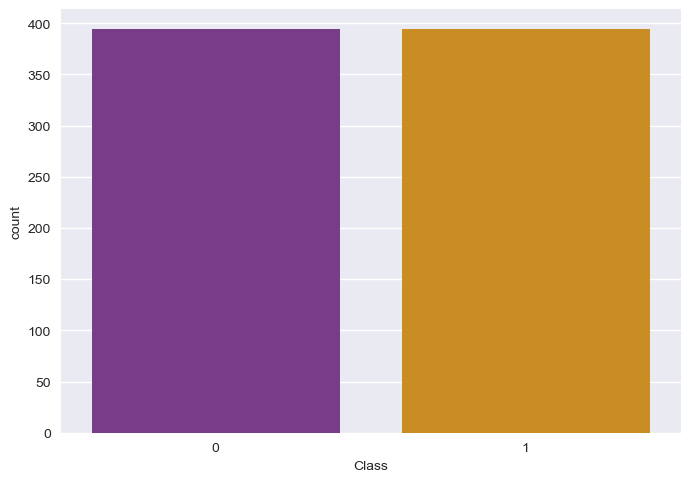

In [16]:
underSampler = RandomUnderSampler(random_state= 42)
X_train_undersampled, y_train_undersampled = underSampler.fit_resample(X_train, y_train)


sns.countplot(x=y_train_undersampled, data=df, palette='CMRmap')

#As we can see our data is now balanced 

### 4.1.2 OverSampling using RandomOverSampler

<Axes: xlabel='Class', ylabel='count'>

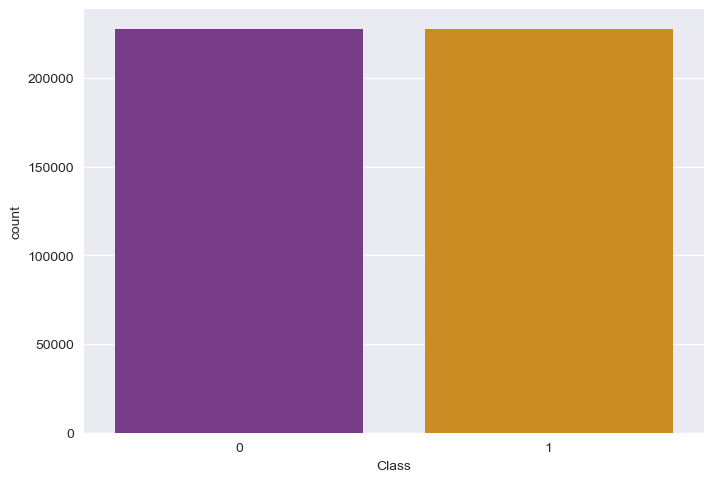

In [17]:
overSampler = RandomOverSampler(random_state = 42)

X_train_oversampled, y_train_oversampled = overSampler.fit_resample(X_train, y_train)

sns.countplot(x=y_train_oversampled, data=df, palette='CMRmap')


## 4.1.3 SMOTE 

SMOTE is another oversampling technique that generates new synthetic samples. It does this by randomly selecting instances from the minority class (fraud) and then for each selected instance of the minority class, finds the k-nearest neighbor and then generates a new data point.

In [18]:
smote = SMOTE(random_state = 42)

X_train_SMOTE, y_train_SMOTE = smote.fit_resample(X_train, y_train)

<Axes: xlabel='Class', ylabel='count'>

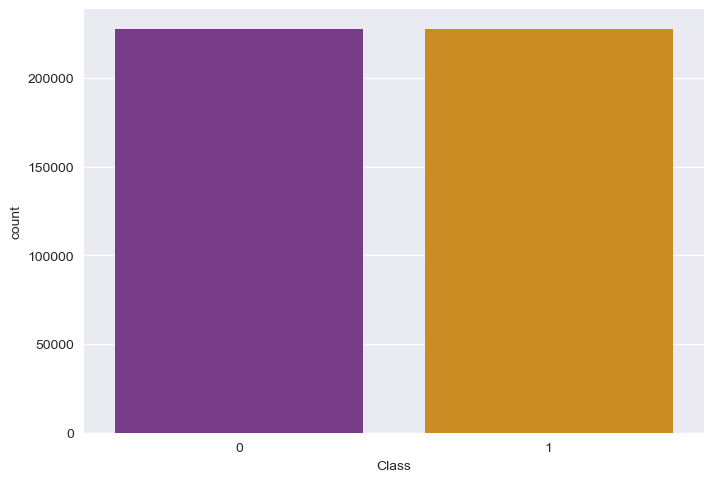

In [19]:
sns.countplot(x=y_train_SMOTE, data=df, palette='CMRmap')

## 5. Deploying Models

### 5.1.1 Logistic Regression on UnderSampled Data

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import matthews_corrcoef



In [21]:
#Training using undersampled data
# Initialize the Logistic Regression model
model = LogisticRegression(max_iter = 5000)

# Train the model
model.fit(X_train_undersampled, y_train_undersampled)

# Make predictions
y_pred = model.predict(X_test)


In [22]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_rep}")

Accuracy: 0.9630104280046347
Confusion Matrix:
[[54764  2100]
 [    7    91]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     56864
           1       0.04      0.93      0.08        98

    accuracy                           0.96     56962
   macro avg       0.52      0.95      0.53     56962
weighted avg       1.00      0.96      0.98     56962



The Matthews Correlation Coefficient is a metric used to evaluate the performance of binary classification models. It ranges from -1 to 1, with 1 being a perfect prediction and - 1 indicating total disagreement between prediction and observation. 

In [23]:
mcc = matthews_corrcoef(y_test, y_pred)
print("Matthews Correlation Coefficient:", mcc)



Matthews Correlation Coefficient: 0.1921433459272642


In terms of model performance, the precision is extremly low with only 4% of instances being actual fraud.

Regarding recall, out of all the actual instances of fraud, 93% were corectlly predicted by the model.

Overall, when it comes to credit card fraud detection, missing an actual case of fraud is considerably worse than misclassifying a case of non-fraud as fraud. Therefore, in the context of fraud detection this is a decent performing model.

. Also logistic regression is very sensitive to outliers which may be a reason for it's poor precision score

<Axes: >

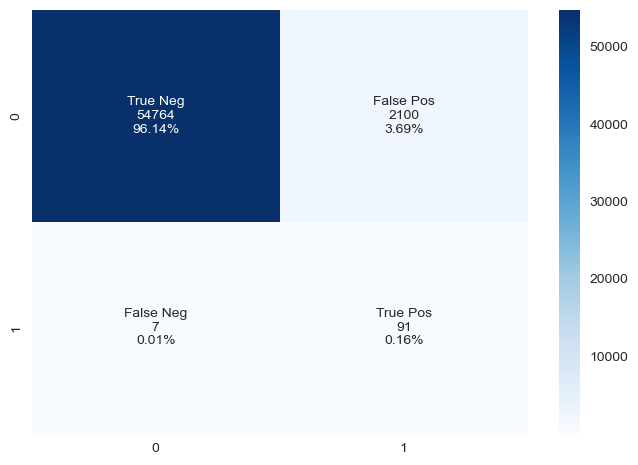

In [24]:
names = ['True Neg','False Pos','False Neg','True Pos']
counts = [value for value in conf_matrix.flatten()]
percentages = ['{0:.2%}'.format(value) for value in conf_matrix.flatten()/np.sum(conf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conf_matrix,annot = labels,cmap = 'Blues',fmt ='')
    

### 5.1.2. K-Nearest Neighbors on UnderSampled Data

KNN is a supervised machine learning algorithm that can be used for both regression and classification tasks. The main idea behind KNN is to make predictions based on the majority class of the k-nearest neighbors in the feature space. 

In [25]:
from sklearn.neighbors import KNeighborsClassifier


In [26]:
knn_undersampled_data = KNeighborsClassifier(n_neighbors = 3)

knn_undersampled_data.fit(X_train_undersampled, y_train_undersampled)

knn_undersampled_preds = knn_undersampled_data.predict(X_test)

In [27]:
knn_report = classification_report(y_test, knn_undersampled_preds)
conf_matrix_knn = confusion_matrix(y_test, knn_undersampled_preds)
KNN_acc_undersampled = accuracy_score(y_test, knn_undersampled_preds)


print("Classification Report:\n", knn_report)
print(f"Confusion Matrix:\n{conf_matrix_knn}")
print("Accuracy Score: \n", KNN_acc_undersampled)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98     56864
           1       0.04      0.89      0.07        98

    accuracy                           0.96     56962
   macro avg       0.52      0.92      0.52     56962
weighted avg       1.00      0.96      0.98     56962

Confusion Matrix:
[[54554  2310]
 [   11    87]]
Accuracy Score: 
 0.9592535374460166


As we can see, the KNN model performed worse than the logistic regresion model on undersampled data, as both the precision and the recall were lower.

<Axes: >

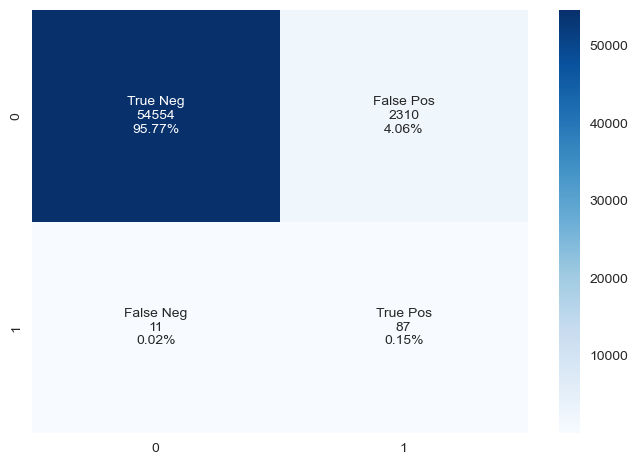

In [28]:
names = ['True Neg','False Pos','False Neg','True Pos']
counts = [value for value in conf_matrix_knn.flatten()]
percentages = ['{0:.2%}'.format(value) for value in conf_matrix_knn.flatten()/np.sum(conf_matrix_knn)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conf_matrix_knn,annot = labels,cmap = 'Blues',fmt ='')
    

High number of false positives 

### 5.1.3. One Class SVM on UnderSampled Data

In [29]:
from sklearn.svm import OneClassSVM


In [30]:
one_class_SVM = OneClassSVM(nu = 0.01, kernel = 'rbf', gamma = 0.01)

one_class_SVM.fit(X_train_undersampled)

one_class_SVM_preds = one_class_SVM.predict(X_test)

#Convert predictions to class lables 
one_class_SVM_preds[one_class_SVM_preds == 1] = 0  # 0 represents normal data
one_class_SVM_preds[one_class_SVM_preds == -1] = 1  # 1 represents anomaly

In [31]:

print("Confusion Matrix:")
print(confusion_matrix(y_test, one_class_SVM_preds))
print("\nClassification Report:")
print(classification_report(y_test, one_class_SVM_preds))


Confusion Matrix:
[[53339  3525]
 [   71    27]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97     56864
           1       0.01      0.28      0.01        98

    accuracy                           0.94     56962
   macro avg       0.50      0.61      0.49     56962
weighted avg       1.00      0.94      0.97     56962



In [32]:
mcc_SVM = matthews_corrcoef(y_test, one_class_SVM_preds)
print("Matthews Correlation Coefficient:", mcc_SVM)


Matthews Correlation Coefficient: 0.036595098997557494


The One class SVM performs terribly, and as the MCC is near 0 it means that the model is not making meaningful predictions

### 5.1.4. Logistic Regression on OverSampled Data

In [33]:
#Training using undersampled data
# Initialize the Logistic Regression model
log_reg_onversample = LogisticRegression(max_iter = 5000)

# Train the model
log_reg_onversample.fit(X_train_oversampled, y_train_oversampled)

# Make predictions
LogReg_oversampled = log_reg_onversample.predict(X_test)

In [34]:
LogReg_oversample_acc = accuracy_score(y_test, LogReg_oversampled)
LogReG_oversample_conf_matrix = confusion_matrix(y_test, LogReg_oversampled)
LogReg_oversample_classification_rep = classification_report(y_test, LogReg_oversampled)

# Print the results
print(f"Accuracy: {LogReg_oversample_acc}")
print(f"Confusion Matrix:\n{LogReG_oversample_conf_matrix}")
print(f"Classification Report:\n{LogReg_oversample_classification_rep}")

Accuracy: 0.9761771005231558
Confusion Matrix:
[[55515  1349]
 [    8    90]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.06      0.92      0.12        98

    accuracy                           0.98     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.98      0.99     56962



As we can see, the logistic regression model performed relatively the same on both undesampled and oversampled data. The recall score for the minority class is quite high, however the precision is quite low 

### 5.1.5.KNN on OverSampled Data

In [35]:
knn_oversampled = KNeighborsClassifier(n_neighbors = 3)

knn_oversampled.fit(X_train_oversampled, y_train_oversampled)

knn_oversampled_preds = knn_oversampled.predict(X_test)

In [36]:
knn_report_oversampled = classification_report(y_test, knn_oversampled_preds)
conf_matrix_knn_oversampled = confusion_matrix(y_test, knn_oversampled_preds)
KNN_acc_oversampled = accuracy_score(y_test, knn_oversampled_preds)

print("Accuracy: \n", KNN_acc_oversampled)
print("Classification Report:\n", knn_report_oversampled)
print("Confusion Matrix:\n", conf_matrix_knn_oversampled)

Accuracy: 
 0.999385555282469
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.81      0.84      0.82        98

    accuracy                           1.00     56962
   macro avg       0.91      0.92      0.91     56962
weighted avg       1.00      1.00      1.00     56962

Confusion Matrix:
 [[56845    19]
 [   16    82]]


In [37]:
mcc_knn_oversampled = matthews_corrcoef(y_test, knn_oversampled_preds)
print("Matthews Correlation Coefficient:", mcc_knn_oversampled)



Matthews Correlation Coefficient: 0.8239068697706394


The KNN model on oversampled data had the best performance with both high recall and high precision. 81% of transactions that have been predicted as fraudulent were actually fraudulent. Moreover, the model is also capturing 84% of the actual fraudulent transactions. However in terms of credit card fraud this number is still too low

<Axes: >

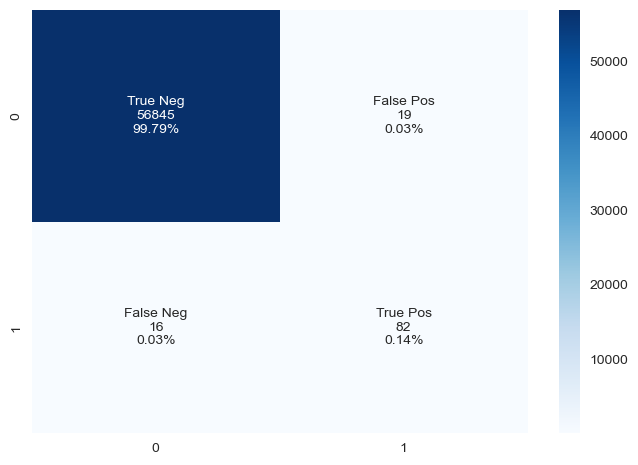

In [38]:
names = ['True Neg','False Pos','False Neg','True Pos']
counts = [value for value in conf_matrix_knn_oversampled.flatten()]
percentages = ['{0:.2%}'.format(value) for value in conf_matrix_knn_oversampled.flatten()/np.sum(conf_matrix_knn_oversampled)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conf_matrix_knn_oversampled,annot = labels,cmap = 'Blues',fmt ='')

### 5.1.6. Logistic Regression on SMOTE 

In [39]:
#Training using undersampled data
# Initialize the Logistic Regression model
LR_Smote = LogisticRegression(max_iter = 5000)

# Train the model
LR_Smote.fit(X_train_SMOTE, y_train_SMOTE)

# Make predictions
LR_smote_preds = LR_Smote.predict(X_test)


In [40]:
LR_Smotee_acc = accuracy_score(y_test, LR_smote_preds)
LR_Smote_conf_matrix = confusion_matrix(y_test, LR_smote_preds)
LR_Smote_classification_rep = classification_report(y_test, LR_smote_preds)

# Print the results
print(f"Accuracy: {LR_Smotee_acc}")
print(f"Confusion Matrix:\n{LR_Smote_conf_matrix}")
print(f"Classification Report:\n{LR_Smote_classification_rep}")

Accuracy: 0.9751764334117482
Confusion Matrix:
[[55457  1407]
 [    7    91]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.06      0.93      0.11        98

    accuracy                           0.98     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.98      0.99     56962



In [41]:
mcc_logistic_regression_smote = matthews_corrcoef(y_test, LR_smote_preds)
print("Matthews Correlation Coefficient:", mcc_logistic_regression_smote)


Matthews Correlation Coefficient: 0.23407558595636774


### 5.1.7. KNN on SMOTE 

In [42]:
knn_smote = KNeighborsClassifier(n_neighbors = 3)

knn_smote.fit(X_train_SMOTE, y_train_SMOTE)

knn_smote_preds = knn_smote.predict(X_test)

In [43]:
KNN_smote_acc = accuracy_score(y_test, knn_smote_preds)
knn_report_smote = classification_report(y_test, knn_smote_preds)
conf_matrix_knn_smote = confusion_matrix(y_test, knn_smote_preds)

print("Accuracy: \n", KNN_smote_acc)
print("Classification Report:\n", knn_report_smote)
print("Confusion Matrix:\n", conf_matrix_knn_smote)

Accuracy: 
 0.9986131104947158
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.56      0.87      0.68        98

    accuracy                           1.00     56962
   macro avg       0.78      0.93      0.84     56962
weighted avg       1.00      1.00      1.00     56962

Confusion Matrix:
 [[56798    66]
 [   13    85]]


### 6. HyperParameter Tuning 

In [44]:
#This cell is just to get the classification reports of the above models, 
#and output them in a dictionary to get access to each score 

classification_rep_log_undersampled = classification_report(y_test, y_pred, output_dict = True)

knn_report = classification_report(y_test, knn_undersampled_preds, output_dict = True)

LogReg_oversample_classification_rep1 = classification_report(y_test, LogReg_oversampled, output_dict = True)

knn_report_oversampled1 = classification_report(y_test, knn_oversampled_preds, output_dict = True)

LR_Smote_classification_rep1 = classification_report(y_test, LR_smote_preds, output_dict = True)

knn_report_smote1 = classification_report(y_test, knn_smote_preds, output_dict = True)

classification_rep1 = classification_report(y_test, y_pred_baseline, output_dict = True)


In [45]:
#Getting the recall and precision for each model, exlucding the one class SVM because of it's terrible performance 
log_reg_under_precision = classification_rep_log_undersampled['1']['precision']
log_reg_under_recall = classification_rep_log_undersampled['1']['recall']

knn_under_precision = knn_report['1']['precision']
knn_under_recall = knn_report['1']['recall']

log_reg_over_precision = LogReg_oversample_classification_rep1 ['1']['precision']
log_reg_over_recall = LogReg_oversample_classification_rep1 ['1']['recall']

knn_over_precision = knn_report_oversampled1['1']['precision']
knn_over_recall = knn_report_oversampled1['1']['recall']

log_reg_smote_precision = LR_Smote_classification_rep1['1']['precision']
log_reg_smote_recall = LR_Smote_classification_rep1['1']['recall']

knn_smote_precision = knn_report_smote1['1']['precision']
knn_smote_recall  = knn_report_smote1['1']['recall']


baseline_precision = knn_report_smote1['1']['precision']
baseline_recall = knn_report_smote1['1']['recall']

In [46]:
#Creating a dataframe to compare results 
data = {
    'Model': ['BaseLine Model','LogReg Undersampled', 'KNN Undersampled', 'LogReg Oversampled', 'KNN Oversampled', 'LogReg SMOTE', 'KNN_Smote'],
    'Precision': [
        classification_rep1['1']['precision'],
        classification_rep_log_undersampled['1']['precision'],
        knn_report['1']['precision'],
        LogReg_oversample_classification_rep1['1']['precision'],
        knn_report_oversampled1['1']['precision'],
        LR_Smote_classification_rep1['1']['precision'],
        knn_report_smote1['1']['precision']
        
    ],
    'Recall': [
        classification_rep1['1']['recall'],
        classification_rep_log_undersampled['1']['recall'],
        knn_report['1']['recall'],
        LogReg_oversample_classification_rep1['1']['recall'],
        knn_report_oversampled1['1']['recall'],
        LR_Smote_classification_rep1['1']['recall'],
        knn_report_smote1['1']['recall'],
        
    ],
    'Accuracyy' : [
        accuracy_baseline,
        accuracy, 
        KNN_acc_undersampled,
        LogReg_oversample_acc,
        KNN_acc_oversampled,
        LR_Smotee_acc,
        KNN_smote_acc
        
        
        
    ]
}

df = pd.DataFrame(data).set_index('Model')
df

,Precision,Recall,Accuracyy
Model,,,
BaseLine Model,0.863636,0.581633,0.999122
LogReg Undersampled,0.041534,0.928571,0.963010
KNN Undersampled,0.036295,0.887755,0.959254
LogReg Oversampled,0.062543,0.918367,0.976177
KNN Oversampled,0.811881,0.836735,0.999386
LogReg SMOTE,0.060748,0.928571,0.975176
KNN_Smote,0.562914,0.867347,0.998613


While recall is the most important metric it is important to recoginize that precision is also relevant. The KNN model trained on oversampled data has both good precision and recall and will be the one to be fine tuned.

Hyperparameter tuning refers to the process of finding the best set of hyperparameters for a given model to optimize its performance. 


In KNN, there are a few key hypeparameters that you can tune to optimize performance:

. Number of neighbours (K)

. The distance metric 

. Weights 


In [54]:

#Define the KNN classifier
#knn = KNeighborsClassifier()

# Define the hyperparameters and their possible values
#param_grid = {
#    'n_neighbors': [3, 5, 7, 9],
#    'weights': ['uniform', 'distance'],
#    'metric': ['euclidean', 'manhattan']
#}

# Use GridSearchCV to find the best hyperparameters
#grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='recall')
#grid_search.fit(X_train, y_train)

# Print the best hyperparameters
#print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}


The best parameters are listed below:

Best Hyperparameters: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}


In [48]:
knn_hypertuned = KNeighborsClassifier(n_neighbors=9, weights='distance', metric='manhattan')

knn_hypertuned.fit(X_train_oversampled, y_train_oversampled)

KNeighborsClassifier(metric='manhattan', n_neighbors=9, weights='distance')

In [49]:
knn_tuned_predictions = knn_hypertuned.predict(X_test)


In [52]:
knn_tuned_accuracy = accuracy_score(y_test, knn_tuned_predictions)
knn_tuned_conf_matrix = confusion_matrix(y_test, knn_tuned_predictions)
knn_tuned_class_rep = classification_report(y_test, knn_tuned_predictions)

# Print the results
print(f"Accuracy: {knn_tuned_accuracy}")
print(f"Confusion Matrix:\n{knn_tuned_conf_matrix}")
print(f"Classification Report:\n{knn_tuned_class_rep}")

Accuracy: 0.9988413328183702
Confusion Matrix:
[[56810    54]
 [   12    86]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.61      0.88      0.72        98

    accuracy                           1.00     56962
   macro avg       0.81      0.94      0.86     56962
weighted avg       1.00      1.00      1.00     56962



In [53]:
knn_tuned_MC = matthews_corrcoef(y_test, knn_tuned_predictions)
print("Matthews Correlation Coefficient:", knn_tuned_MC)


Matthews Correlation Coefficient: 0.7336883417972658


Overall, by changing the parameters of the KNN model we were able to get higher recall and higher precision with the trade off being training time. However, more improvement is needed to minimize false positives. A potential way to do this would be to sacrifice precision in order to get better recall. 